# Ejercicios de OpenCV

Hemos visto cómo ver funciones básicas de OpenCV. Ahora lo pondremos en práctica.

Tu tarea es poner en práctica lo que has aprendido en términos de procesamiento de imágenes con un ejemplo similar a lo que hemos visto en clase.

## Ejercicio 1

Usando OpenCV, cargando la imagen `camp.png`, encuentra los bordes y enmarcarlas en verde. Muestra el resultado.

## Ejercicio 2

Hemos visto cómo detectar el movimiento utilizando las diferencias entre dos _frames_ consecutivos. Ahora, carga `EX1.-vtest.mp4` y utiliza este método para detectar el movimiento en un video y usar la técnica vista en el ejemplo de la línea que rastrea el objeto que se está moviendo.

## Ejercicio 3

Calcular el flujo óptico de `vtest.mp4` y visualizalo.

## Ejercicio 1

In [96]:
%pip install matplotlib opencv-python-headless

In [97]:
# Cargamos las librerías necesarias para la práctica
import numpy as np
import cv2
import matplotlib.pyplot as plt

(640, 960, 3)


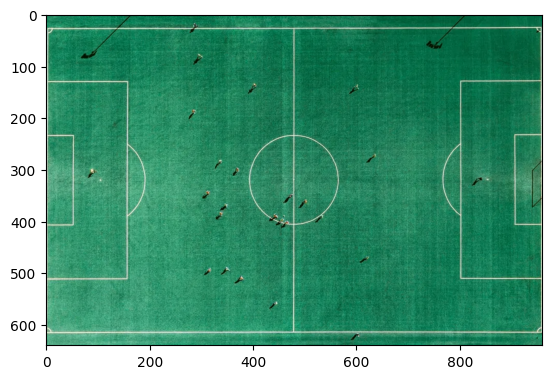

In [98]:
# Cargamos la imagen inicial:
im = cv2.imread("camp.png")
print(im.shape)
plt.imshow(im)

(640, 960)


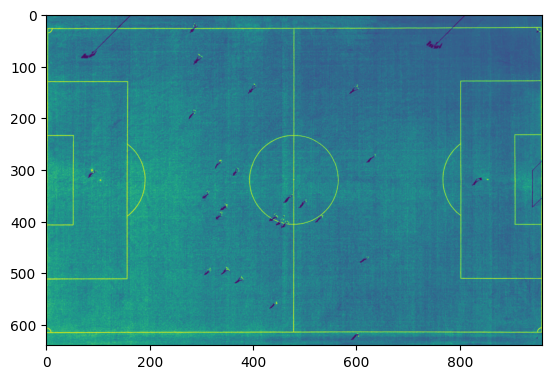

In [99]:
im_bn = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im_bn.shape)
plt.imshow(im_bn)

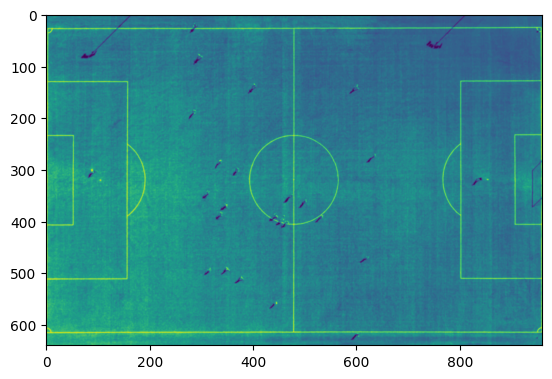

In [100]:
im_blurred = cv2.GaussianBlur(im_bn, (3, 3), 0)
plt.imshow(im_blurred)

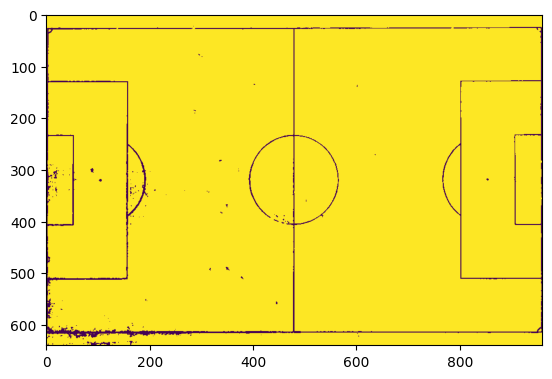

In [101]:
ret, im_th = cv2.threshold(im_blurred,157,255,cv2.THRESH_BINARY_INV)
plt.imshow(im_th)

In [102]:
im_th_copy = im_th.copy()
contours, _ = cv2.findContours(im_th_copy, 1, cv2.CHAIN_APPROX_NONE)

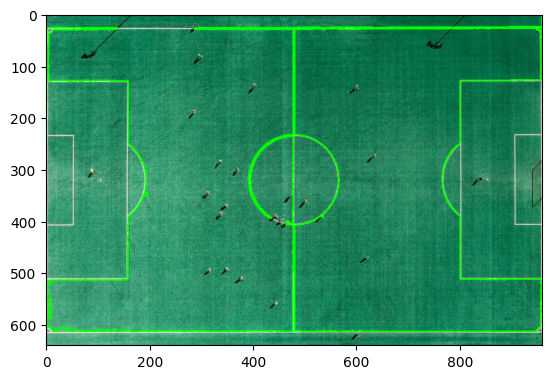

In [103]:
if len(contours) != 0:
    max_contour = max(contours, key = cv2.contourArea)
    cv2.drawContours(im, [max_contour], 0, (0, 255, 0), 2)
    plt.imshow(im)

## Ejercicio 2

Loaded 795 frames


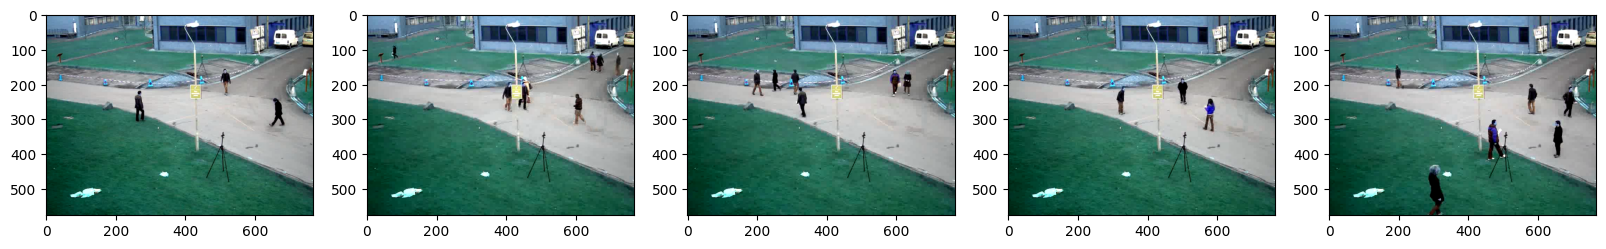

In [104]:
vid = cv2.VideoCapture("EX1.-vtest.mp4")

frames = []
while True:
    ret, frame = vid.read()
    if not ret:
        break
    frames.append(frame)

vid.release()
print(f"Loaded {len(frames)} frames")

# Mostrem els frames de 150 en 150 en una mateixa fila

fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axs[i].imshow(frames[i*150])

In [105]:
frames_bn = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]

In [106]:
diffs = [(p2 - p1) for p1, p2 in zip(frames_bn[:-1], frames_bn[1:])]

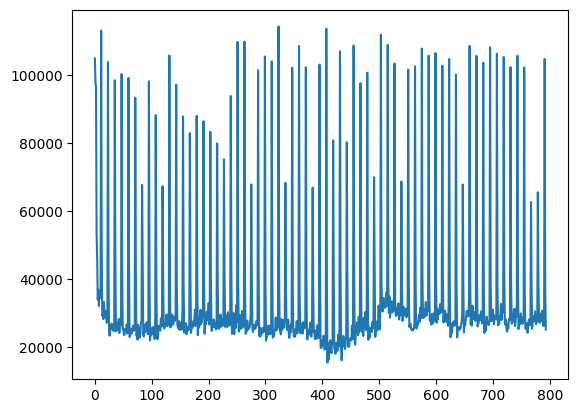

In [107]:
diffs_norms = np.array([np.linalg.norm(x) for x in diffs])

plt.plot(diffs_norms)

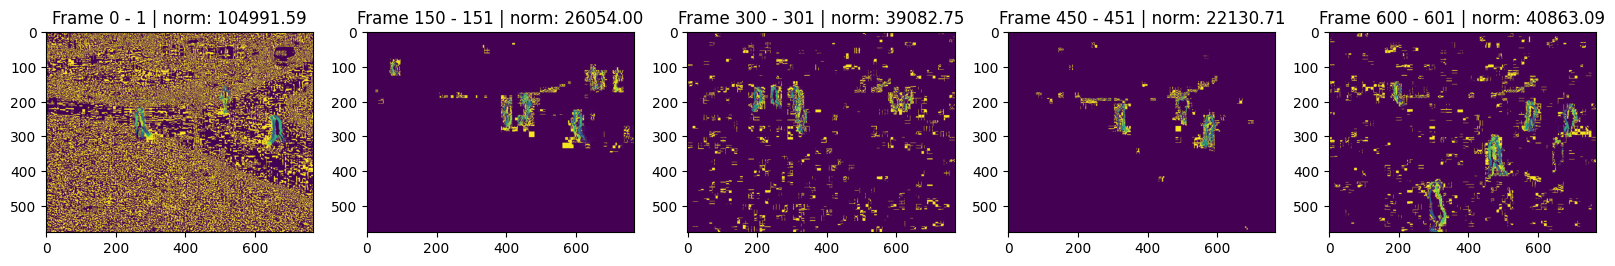

In [108]:
# Mostrem diffs de 150 en 150

fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axs[i].imshow(diffs[i*150])
    axs[i].set_title(f"Frame {i*150} - {i*150+1} | norm: {diffs_norms[i*150]:.2f}")

In [109]:
thresold = 25000
frames_moviment = [i for i, frame in enumerate(frames) if diffs_norms[i-1] > thresold]

frames_minims_event = 30

# Haurem de buscar les subsequències de frames_moviment que tinguin com a mínim frames_minims_event frames y no siguen consecutius

def find_events(frames_moviment, frames_minims_event):
    events = []
    event = []
    for i, frame in enumerate(frames_moviment):
        if len(event) == 0:
            event.append(frame)
        else:
            if frame - event[-1] == 1:
                event.append(frame)
            else:
                if len(event) >= frames_minims_event:
                    events.append(event)
                event = []
    return events

events = find_events(frames_moviment, frames_minims_event)
print(events)

[[118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241], [498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559], [562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625], [652, 653, 654, 655, 656, 657, 658, 

Event from frame 118 to frame 149
Event from frame 209 to frame 241
Event from frame 498 to frame 559
Event from frame 562 to frame 625
Event from frame 652 to frame 685
Event from frame 689 to frame 725
Event from frame 728 to frame 761


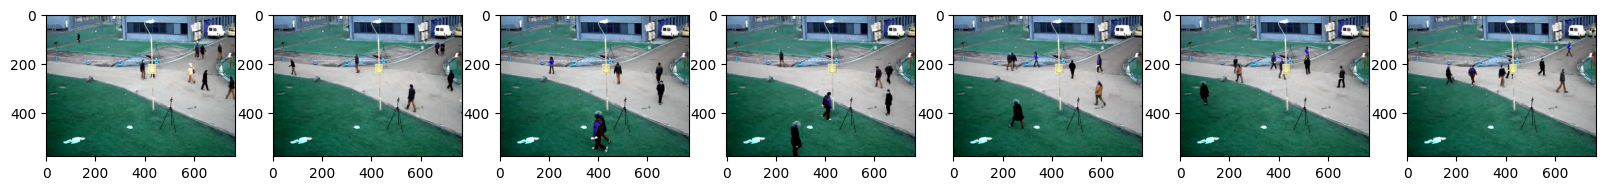

In [110]:
for event in events:
    print(f"Event from frame {event[0]} to frame {event[-1]}")

fig, axs = plt.subplots(1, len(events), figsize=(20, 20))
for i in range(len(events)):
    # Frame central de l'event
    frame = events[i][len(events[i])//2]
    axs[i].imshow(frames[frame])

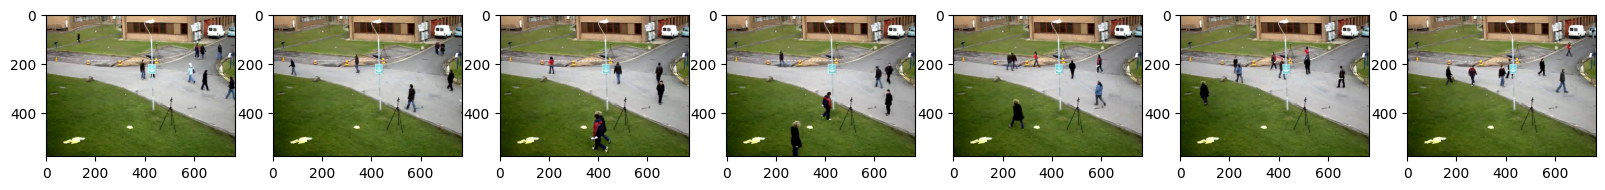

In [111]:
frames_rgb = [cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in frames]

fig, axs = plt.subplots(1, len(events), figsize=(20, 20))
for i in range(len(events)):
    # Frame central de l'event
    frame = events[i][len(events[i])//2]
    axs[i].imshow(frames_rgb[frame])

## Ejercicio 3

In [112]:
flows = [cv2.calcOpticalFlowFarneback(frames_bn[i], frames_bn[i+1], None, 0.5, 3, 15, 3, 5, 1.2, 0) for i in range(len(frames_bn)-1)]

flows[0].shape

(576, 768, 2)

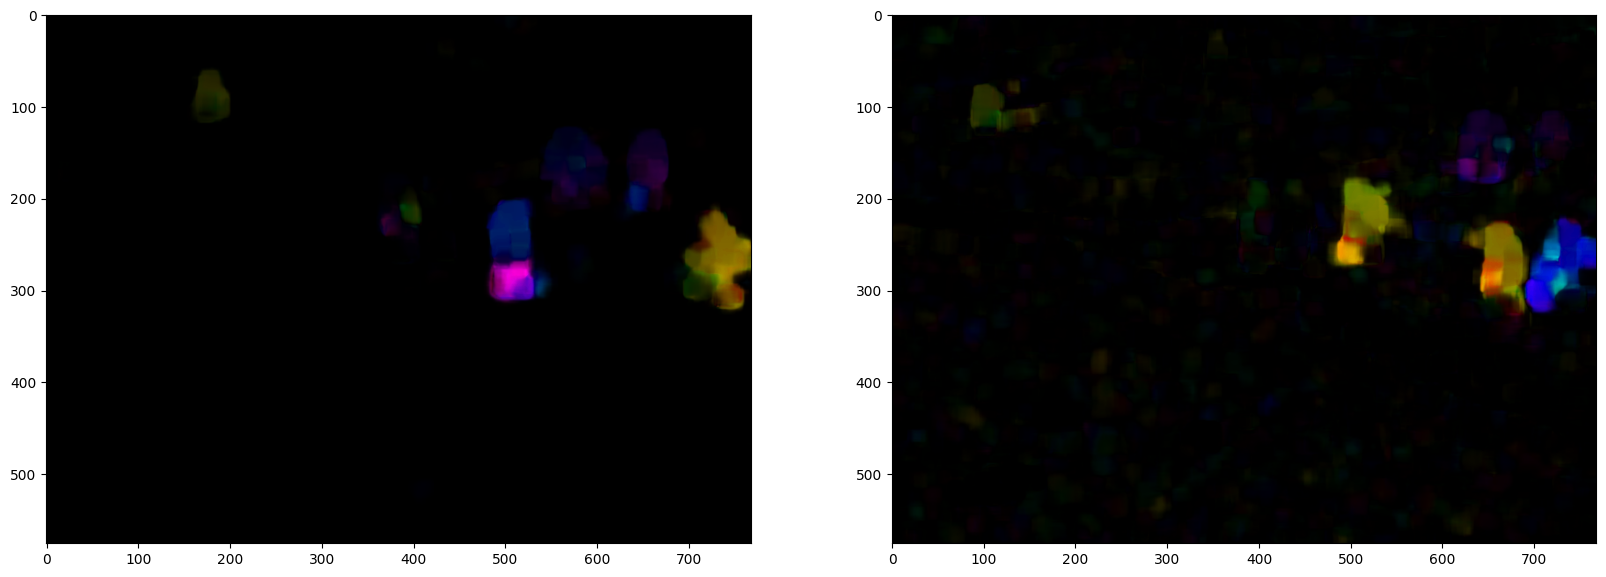

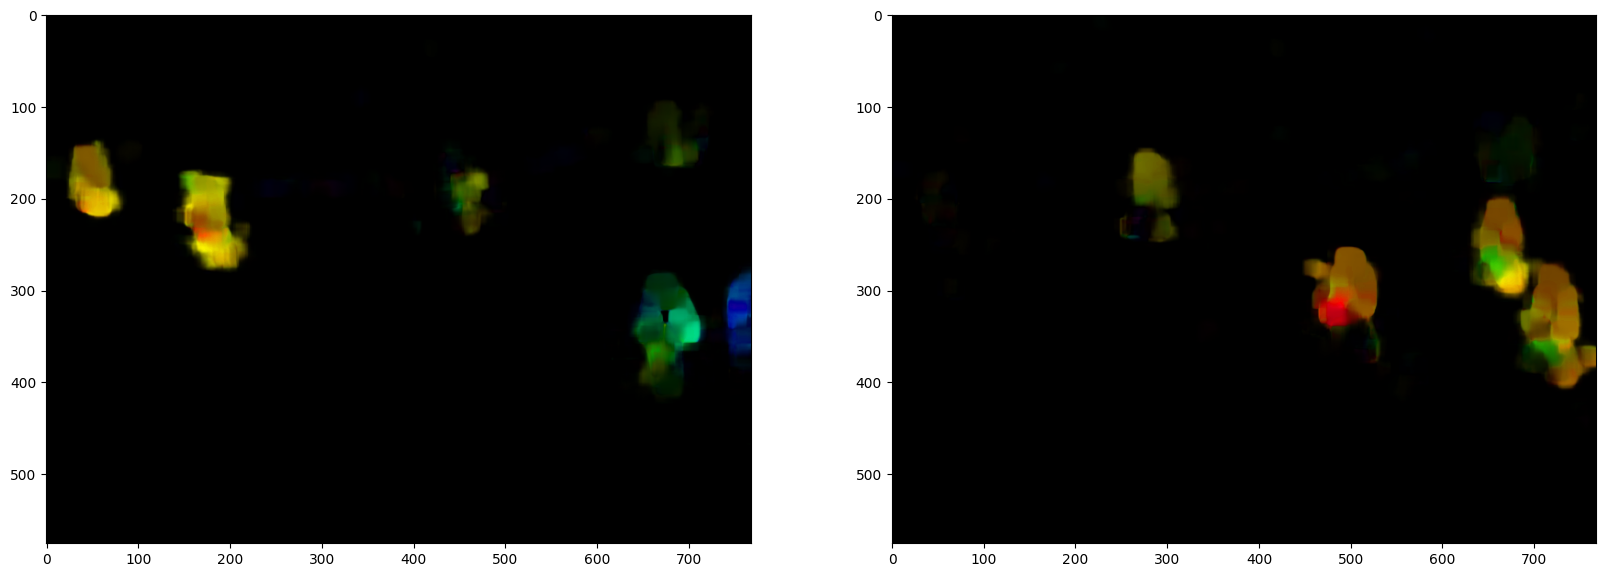

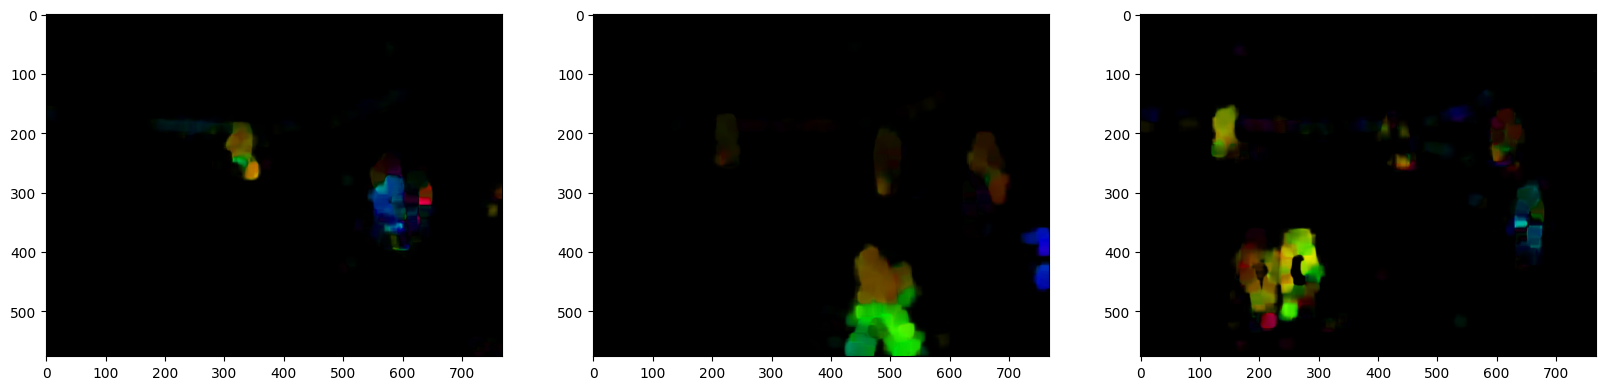

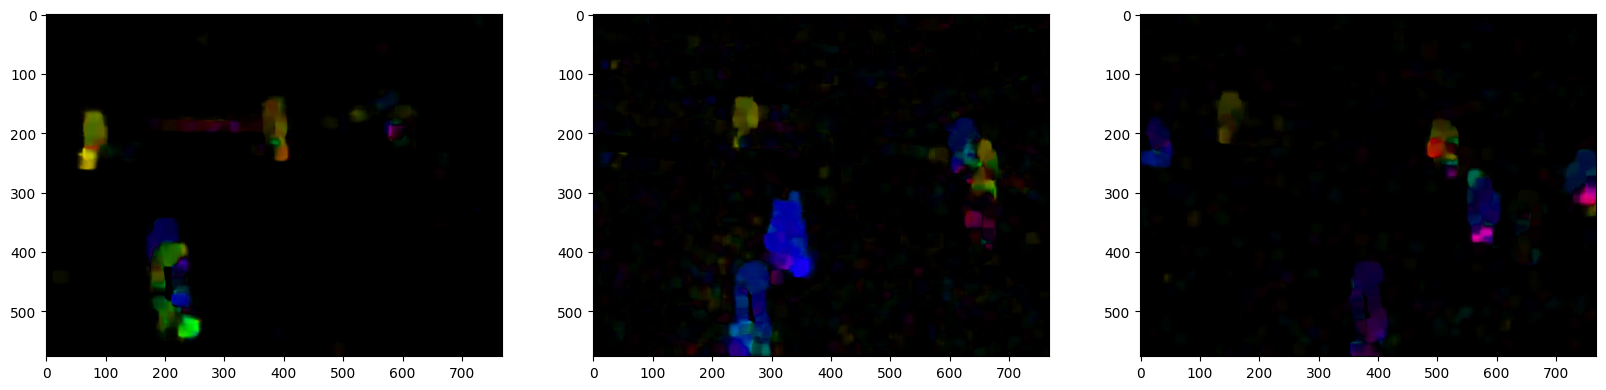

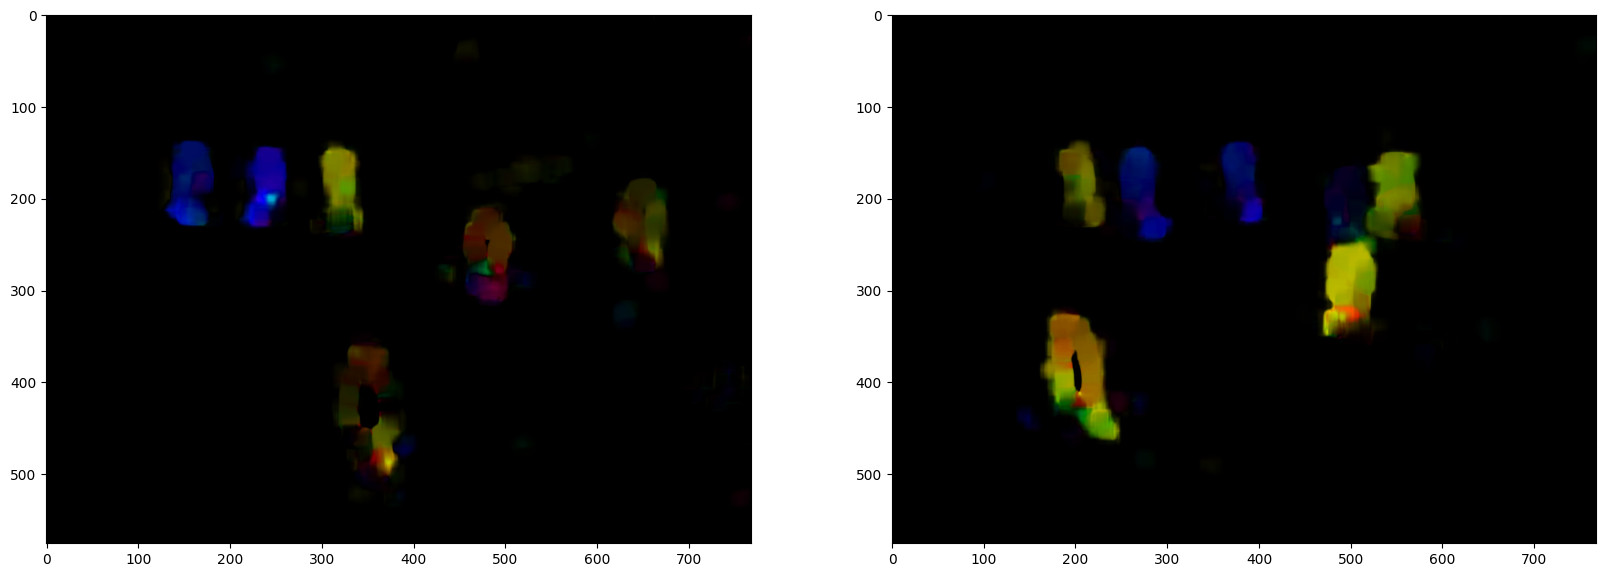

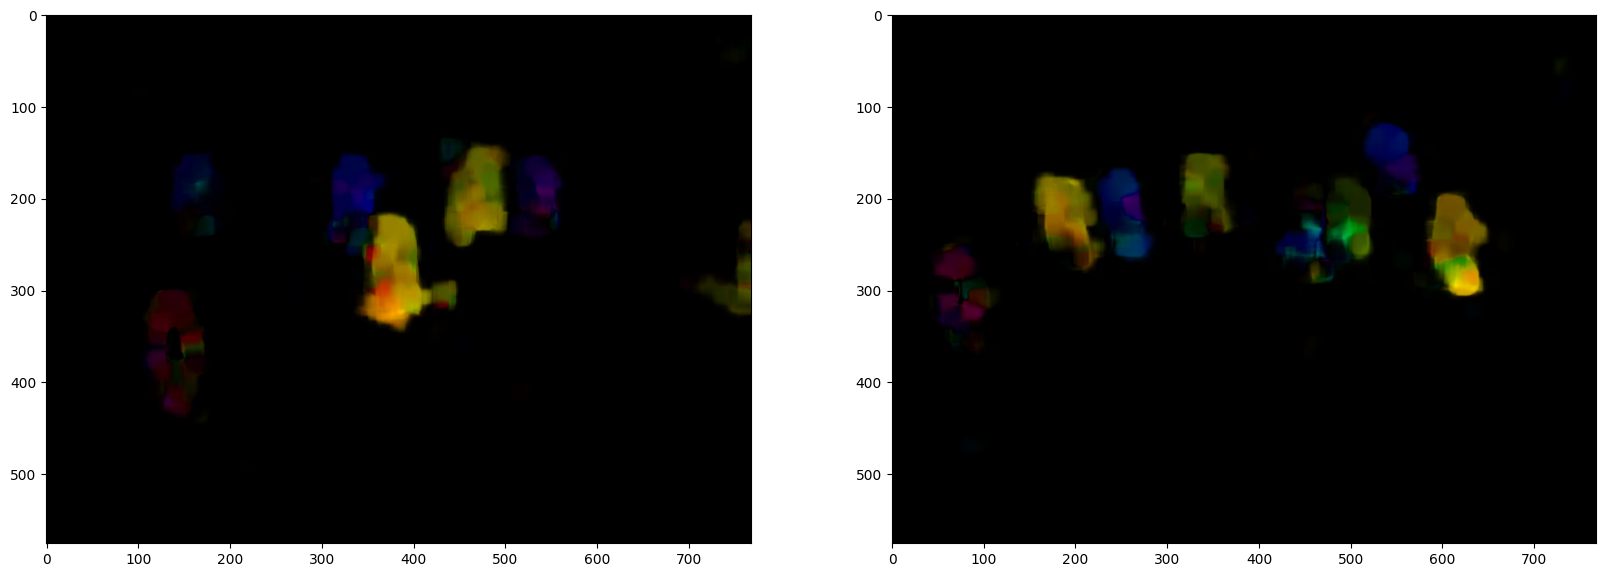

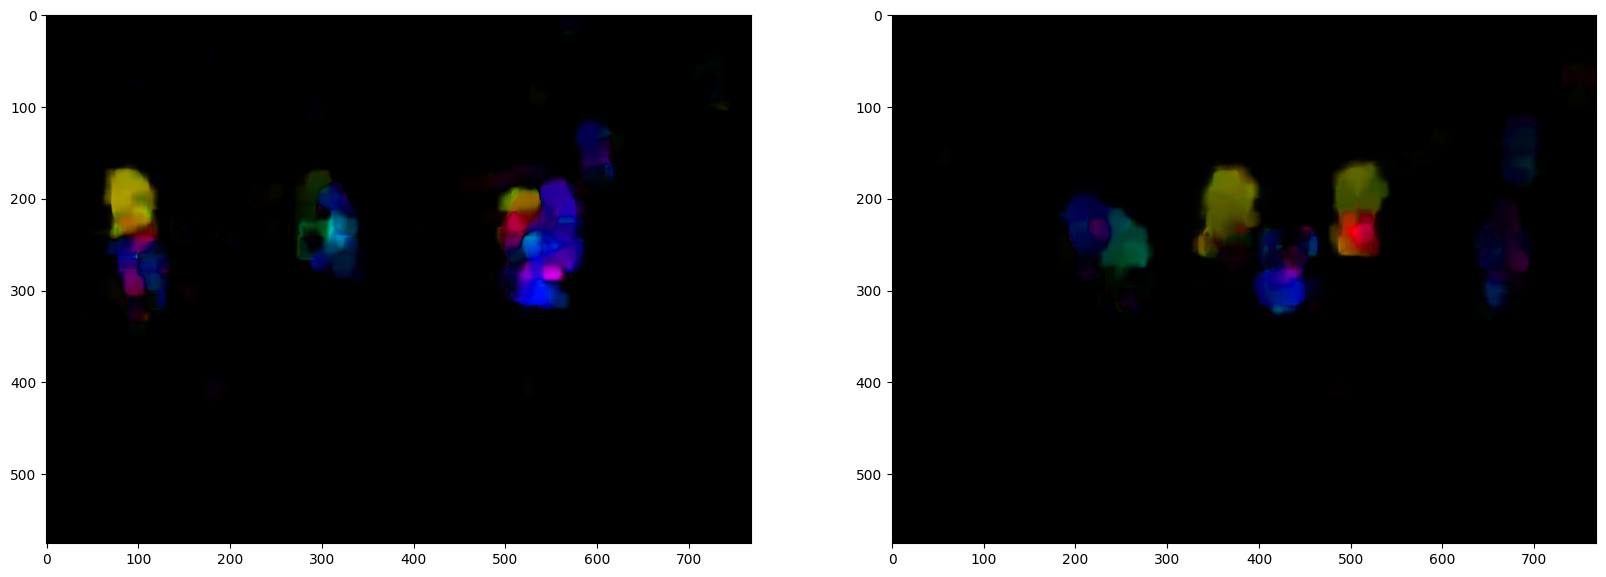

In [113]:
def flow_to_hsv(flow):
    hsvImg = np.zeros((flow.shape[0],flow.shape[1],3),dtype=np.uint8)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsvImg[..., 0] = 0.5 * ang * 180 / np.pi
    hsvImg[..., 1] = 255
    hsvImg[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    return cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)


for event in events:
    start = event[0]
    stop = event[-1]
    frms = [flow_to_hsv(x) for x in flows[start:stop]]

    fig, axs = plt.subplots(1, len(frms)//25 + 1, figsize=(20, 20))
    for i, flow in enumerate(frms[::25]):
        axs[i].imshow(flow)
